# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("D:\sjurs\Skole\TMA4215 Nummat\styles\TMA4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## Part 2: The Heat Equation

After the crash course on finite difference methods in the first part we now return
to more known waters, namely numerical methods for ODE. The main goal
of this part  to develop a solver for the __classical heat equation__
\begin{alignat*}{3}
\partial_t u - \kappa \Delta u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega.
\end{alignat*}
and this will be accomplished by
transforming the heat equation into an (large) ODE system
with the help of the finite difference method.

### Chapter 1: The Crank-Nicolson and $\theta$-Method for ODEs

We start from SMIA Lecture 22 on Runge-Kutta methods (have a look at the Jupyter notebook for concepts and notation).

#### Task 1: Derivation of the Crank-Nicolsen method

We recall the initial value problem for ordinary differential equations:

Given function $f: [0,T] \times \RR^n \to \RR^n$ and initial value
$y_0 \in \RR$, find $y: [0,T] \to \RR^n$ such that
\begin{align}
y'(t) &= f(t,y(t)) \quad t \in (0,T),
\tag{1a}
\\
y(0) &= y_0.
\tag{1b}
\end{align}

Recall the integral representation of (1a)-(1b) considered in Lecture 21 and 22
and apply the trapezoidal rule to the integral. 

__a__) How does the resulting one-step method look like?

<font color="blue"> Solution: </font>

$$ y'(t) = f(t,y(t)), \quad t \in (0,T)$$ $$\Rightarrow y(t_{i+1})-y(t_i)=\int ^{t_{i+1}}_{t_i}f(\tau,y(\tau))d\tau, \quad i = 0,1,...,n-1,n, \quad t_n = T $$

Applying the trapezoid rule: $\int ^{t_{i+1}}_{t_i}f(\tau,y(\tau))d\tau \approx \frac{h}{2}\left(f(t_i,y(t_i))+f(t_{i+1},y(t_{i+1}))\right), \quad h = t_{i+1}-t_i.$

Hence, $y_{i+1} \approx y_i + \frac{h}{2}\left(f(t_i,y(t_i))+f(t_{i+1},y(t_{i+1}))\right).$

It is apparent that the trapezoidal rule is an implicit one-step method.

As a side note: Heun's method is also called the explicit trapezoid method. It is explicit and one-step. This method calculates an estimate for the implicit $y_{i+1}$ using Euler's method:
$$\tilde{y}_{i+1}= y_i + h f(t_n,y_n),$$
before this is used in the final formula: $y_{i+1} \approx y_i + \frac{h}{2}\left(f(t_i,y_i)+f(t_{i+1},\tilde{y}_{i+1})\right).$

__b__) Is this a Runge-Kutta method? Write down the Butcher table. 

<font color="blue"> Solution: </font>

It is readily apparent that the trapezoid rule is a Runge-Kutta method (the explicit trapezoid method too, for that sake), as the calculation $n$-th point of $y$ can be expressed as

$$ y_{n+1} = y_n + \frac{h}{2}\left(f(t_n,y_n)+f(t_{n+1},y_{n+1}))\right) = 
y_n + h\sum_{i=1}^2 b_ik_i,$$
where $b_1=b_2=\frac{1}{2},\quad k_1 = f(t_n,y_n),\quad k_2=f(t_{n+1},y_{n+1})=f\left(t_n+h,y_n + h\sum^2_{j=1}\frac{k_j}{2}\right).$


The resulting Butcher table/tableau is given by
$
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 1/2 & 1/2
\\
\hline
& 1/2 & 1/2
\end{array}
$.

#### Task 2: The the $\theta$-method

For $\theta \in [0,1]$ define the one-step theta method by

$$
y_{i+1} = y_i + h\left(\theta f(t_{i+1}, y_{i+1}) + (1-\theta)  f(t_{i}, y_{i})\right),
$$
so for a given $\theta$, a weighted sum/convex combination 
of $(t_{i+1}, y_{i+1})$ and $f(t_{i}, y_{i})$ is taken.

__a__) Write down the Butcher table.

<font color="blue"> Solution: </font>
$
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 1-\theta & \theta
\\
\hline
& 1-\theta & \theta
\end{array}
$.

__b__) Which known schemes to you get for $\theta=0,1,0.5$?

<font color="blue"> Solution: </font>
1. $\theta=0 \qquad \Rightarrow y_{i+1} = y_i + hf(t_i,y_i);$ Euler's method.
2. $\theta=1 \qquad \Rightarrow y_{i+1} = y_i + hf(t_i+h,y_{i+1});$ Backwards Euler.
3. $\theta=0.5 \qquad \Rightarrow y_{i+1} = y_i + \frac{h}{2}(f(t_i,y_i)+f(t_i+h,y_{i+1}));$ Trapezoid rule.

__c__) Use the __order conditions__ to determine the consistency order of the   $\theta$-method. (Your answer will depend on the choice of $\theta$. 
(Order condition will be discussed in the Lectures notes for cancelled Lecture 23).

<font color="blue"> Solution: </font>



__d__) Determine the stability function for $\theta$-method. (Will be the topic
in the Lecture on Wednesday, 13th of Nov.) 

<font color="blue"> Solution: </font>

The stability function is derived from following IVP (also given in task 3):
$\quad y' = \mu y, \quad y(0)= y_0, \quad \mu\in\mathbb{C}.$

This leads to the expression $f(t,y)=\mu y$
$$ \Rightarrow y_{n+1} = y_n + h\left(\theta f(t_{n+1}, y_{n+1}) + (1-\theta)  f(t_{n}, y_{n})\right)= y_n + h\mu\left(\theta y_{n+1} + (1-\theta)y_n\right).$$

Defining $z:=\mu h$ yields the following function:
$$y_{n+1}=\frac{1+h\mu (1-\theta)}{1-h\mu\theta}y_n = \frac{1+z (1-\theta)}{1-z\theta}y_n = R(z)y_n, $$
where $R(z)$ is the stability function for the $\theta$-method. 

The function is stable when $|y_{n+1}|=|R(z)y_n|\leq |y_n|$, meaning that the stability domain $D_{\theta}$ is given by
$$D_{\theta} = \left\{ z \in \mathbb{C}: |R(z)|= \left|\frac{1+z (1-\theta)}{1-z\theta}\right|\leq 1\right\}.$$

#### Task 3

Implement the $\theta$ method and compute the numerical solution to simple initial value 
problem
$$
y' = \mu y 
\\
y(0) = y_0.
$$

__a__) Implement the general $\theta$-method and validate your implementation
by computing the numerical solution for
initial vale problem on the interval $(0,1)$ for $y_0=1$, $\mu = 1$, including a 
convergence/EOC test as we did before.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def theta_method(y0, mu, t0, T, n, theta=0.5):
    ys = [y0]
    z = mu* (T-t0)/n # mu * h
    R = lambda y,theta,z: (1 + z*(1 - theta)) / (1 - z*theta) * y #Implementing R function from above
    for i in range(n-1): ys.append(R(ys[-1],theta,z))
    return np.array(ys)

u = lambda t,y0,mu: y0*np.exp(mu*t) #exact solution
u = lambda t,y0,mu: y0*np.cos(mu*t)
t0,T,y0,mu = 0,1,1,1 #initial conditions
thetas = (0.,0.5,1.0)

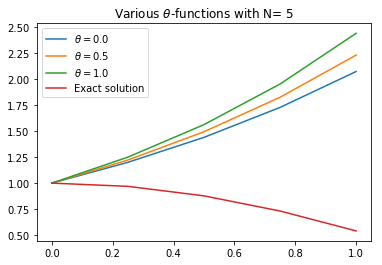

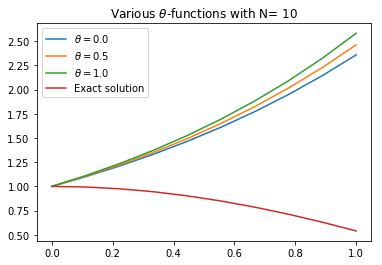

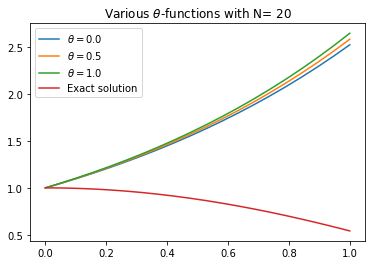

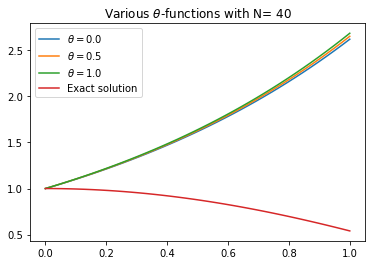

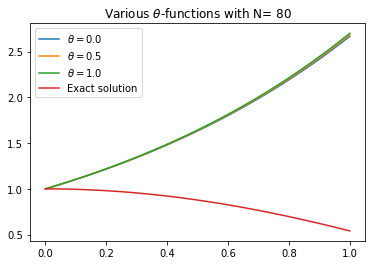

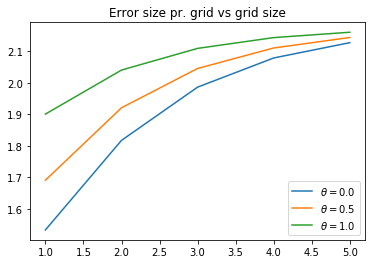

[[0.24543293577138195,
  0.12826543080887573,
  0.06574242095382078,
  0.033304935208463754],
 [0.1839073734767731,
  0.09077988034772638,
  0.045176995569322975,
  0.02254483200162073],
 [0.10234863082696356,
  0.04787371342863287,
  0.023197580827273523,
  0.011423341719797692]]

In [53]:


ys = [[],[],[]]
errs = [[],[],[]]
hs = []
for N in [5, 10, 20, 40, 80]:
    ts = np.linspace(t0,T,N)
    exact = u(ts,y0,mu)
    hs.append(1./N)
    for i in range(len(ys)):
        ys[i] =theta_method(y0, mu, t0, T, N,thetas[i])
        errs[i].append(np.max(np.abs(ys[i]- exact)))
    plt.figure()
    plt.title(r"Various $\theta$-functions with N= {}".format(N))
    for i in range(3): 
        plt.plot(ts,theta_method(y0,mu,t0,T,N,thetas[i]),label=r"$\theta=${}".format(thetas[i]))
    plt.plot(ts,u(ts,y0,mu),label="Exact solution")
    plt.legend()
    plt.show()

ns = np.arange(1,6)
plt.figure()
plt.title("Error size pr. grid vs grid size")
for i in range(3): 
    plt.plot(ns,errs[i],label=r"$\theta=${}".format(thetas[i]))
plt.legend()
plt.show()

eoc = [[],[],[]]

for i in range(0, len(errs)):
    for j in range(1,len(errs[i])):
        numer = np.log10(errs[i][j]) - np.log10(errs[i][j-1])
        denom = np.log10(1/hs[j]) - np.log10(1/hs[j-1])
        eoc[i].append(np.abs(numer/denom))
eoc

__b)__ Now for $\mu \in \{-10, -100, -1000\}$ define the reference step length
$\tau_{\mu} = \dfrac{2}{|\mu|}$, plot the exact solutions and compute and plot
the numerical solution for $\tau \in \{ 5\tau_{\mu}, \tau_{\mu}, 1/5\tau_{\mu} \}$
and $\theta \in \{0, 0.5, 1\}$ What do you oberserve and why?

<font color="blue"> Solution: </font>

In [11]:
# Preferring to use h instead of tau, such that h=tau
h_mu = lambda mu: 2/mu

mus    = np.array([-10., -100., -1000.])
hs     = np.array([5*h_mu(mus), h_mu(mus), .2*h_mu(mus)]) # shape = (3,3)
thetas = np.array([0,0.5,1])




(3, 3)


### Chapter 2: The $\theta$-method for the heat equation

\Now you are asked to combine the $\theta$ scheme the finite difference method 
as space discretization to solve the heat equation

\begin{alignat*}{3}
\partial_t u  - \Delta u  &= f  \quad && \text{in } \Omega \times (0,T]
\\
u &= g_D \quad && \text{on } \partial \Omega \times (0, T]
\\
u(x,0) &=  u_0(x) \quad && \text{in } \Omega
\end{alignat*}
 
with initial value $u_0$ and bounday value $g_D$. As before $\Omega = [0,1]^2$.
We proceed as follows.

As in Chapter 2 of part 1 a grid of $N = (n+1)^2$ grid points
$$
\{(x_j,y_j)\}_{i,j=0}^n = \{(ih,jh) \in [0,1]^2: 0\leqslant i,j \leqslant n \}
$$ are defined with the grid size $h = 1/n$.

Now we discretize in space first, starting from the idea that
\begin{align}
f(x,y,t) &= \partial_t u(x,y,t)  - \Delta u(x,y,t)
\nonumber
\\
&\approx \partial_t u(x,y,t)- (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x,y,t)
\nonumber
\end{align}

Since we have a partial differential equation which depends on time,
the idea is to associate with each grid point $(x_i,y_j)$ a 
__time-dependent__ unknown $U_{i,j}(t)$. Then using the finite difference method 
in space to discretize the Poisson operator $-\Delta$ we end up with the following
__system of ordinary differential equations__:

Find $U(t) = \{U_{i,j}\}_{i,j=0}^n \in \RR^{(n+1)^2} = \RR^N$ such that
\begin{align}
&\dfrac{d}{dt}U_{i,j}(t) 
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}(t)
\nonumber
\\
=
&\dfrac{d}{dt}U_{i,j}(t) + \dfrac{4 U_{i,j}(t) - U_{i+1,j}(t) - U_{i,j+1}(t) - U_{i-1, j}(t) -  U_{i, j-1}(t)}{h^2}
\nonumber
\\
= & f(x_i, y_j,t) =: F_{ij}(t) \quad \text{for } i,j = 1,\ldots n-1,
\tag{2a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{2b}
\end{align}
together with the boundary conditions
\begin{gather}
U_{i,j}(t) = g_D(x_i, y_j, t) \quad \text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
\tag{2c}
\end{gather}

This is often also called a __semi-discretization (in space)__ of the heat equation (since we only discretized the equation in space but not yet in time).

Next, we subdivide $(0,T)$ into $m$ subintervals defined by the points
$\{t_k\}_{k=0}^m$ with $t_k = \tfrac{k T}{m}$,
and apply the $\theta$ method to the ODE system (2a).
We write $U_{i,j}^k$ for the approximation of $U_{i,j}(t_k)$,
$F_{i,j}^k = F_{i,j}(t_k)$,
and introduce $\overline{\theta} = 1 - \theta$.
Then after reordering terms we need to solve
\begin{align}
&\phantom{=} U_{i,j}^{k+1} 
+\tau \theta \dfrac{4 U_{i,j}^{k+1} - U_{i+1,j}^{k+1} - U_{i,j+1}^{k+1} - U_{i-1, j}^{k+1} -  U_{i, j-1}^{k+1}}{h^2}
\nonumber
\\
&= U_{i,j}^{k} -\tau \theta \dfrac{4 U_{i,j}^{k} - U_{i+1,j}^{k} - U_{i,j+1}^{k} - U_{i-1, j}^{k} -  U_{i, j-1}^{k}}{h^2}   + \tau \theta F_{ij}^{k+1} + \tau \overline{\theta} F_{ij}^{k}
\quad \text{for } i,j = 1,\ldots n-1,
\tag{3a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{3b}
\end{align}
together with the boundary conditions
\begin{align}
U_{i,j}^{k+1} = g_D(x_i, y_j, t_{k+1}) \quad 
&\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}
\nonumber
\\
&\text{for } k = 1, \ldots, m.
\tag{3c}
\end{align}


Finally, we need to translate (3a)-(3c) into a linear  system.
We introduce again as for the 2D Poisson problem an index mapping $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$ to translate the double index into a single index $I = I(i,j) \in \RR^N$, $N=(n+1)^2$. Then applying the $\theta$ scheme to (2a) results in the
following method:

* Set $U^0 = \{U^0_{I}\}_{I=0}^{N-1} \in \RR^N$ with $U^0_{I(i,j)} = u_0(x_i, y_j)$ 
 for $i,j = 0,\ldots n$.
* For $k=0,\ldots, m-1$, compute $U^{k+1} \in \RR^N$ by solving the
linear system
 \begin{align}
 (\Id + \tau \theta A)U^{k+1}
= B^{k+1}
\tag{4}
\end{align}

Note this is only the case if $\theta > 0$, for $\theta = 0$, we have an explicit solver.
Here $\Id$ is the $N \times N$ identity matrix, and $A$ is the $N\times N$ matrix
resulting from the finite difference operator after index-remapping, and
with $A_{I,I} = 0$ for those index $I$ which correspond to a boundary index tuple
$(i,j)$. So $A$ is in principal the same matrix you implemented
in Part 1, Chapter 2, Task 3 but __without__ the extra modifications to set
boundary conditions.

The right-hand side $B^{k+1} \in \RR^{N}$ is computed as follows. First you compute
$$
B^{k+1} := (\Id - \tau \overline{\theta} A)U^{k}
+ \tau \theta F^{k+1} + \tau \overline{\theta} F^{k}.
$$
To incorporate the boundary conditions, you now modify $B^{k+1}$
for those index $I$ which correspond to a boundary index tuple 
$(i,j)$ by setting
$$
B^{k+1}_{I(i,j)} = g_D(x_i, y_j, t_{k+1}) \quad 
\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
$$
Since $A_{I,I}= 0$ for those indices, we see that then
$$
 ((\Id + \tau \theta A)U^{k+1})_{I} = U^{k+1}_{I} = B^{k+1}_{I} = g_D(x_i, y_j, t_{k+1})
$$
so $U^{k+1}$ satisfy our boundary condition at the boundary grid points at $t_{k+1}$.

#### Task 4

Implement the resuling solver to solve the heat equation. Reuse as much code
as possible from Part 1, Chapter 2 on the 2D Poisson problem, in particular
the generation of the finite difference matrix and the implementation of 
boundary conditions.

For code validation, use analytical reference function of the form
$$
u(x,y,t) = \sin(k x) \sin(l y)\exp(-\mu t)
$$
on $\Omega = [0,2\pi]^2$ and $t_0 = 0$ and $T = 1$.
for some integers $k, l$ and a constant $\mu$.

__a__) Find $\mu = \mu(k,l)$ so that u(x,y,t) is a solution of the
heat equation with $f = 0$.

__b__) For $\theta \in \{0, 0.5, 1\}$ compute the numerical solution with initial data and boundary data corresponding to the function you determined in __a__)
on a number of grids with $n = \{10, 20, 40, 80\}$ corresponding to grid sizes $h = \{2\pi/10, 2\pi/20, 2\pi/40, 2\pi/80\}$.

For each of the $h$, choose the corresponding time step $\tau = h/(2\pi)$
to run your simulation and create an animation (see coding hints below)
for

* the exact solution;
* the numerical solution;
* the error function defined by $E_{i,j}^k = U^k_{i,j} - u(x_i, y_i, t_k)$.

__c__) For the simulation you ran in __b__) compute the total error as
as a function of $n$
$$
\mathrm{err(n)} = \max_{k} \max_{i,j} | U^k_{i,j} - u(x_i, y_i, t_k) |
$$
What error convergence rates do you obtain for the various $\theta$?

### Code Snippets I

Focus on the __sparse matrix__ based implementationyour learned about in Part 1 Chapter 2. So import the following:

In [67]:
from scipy.sparse import identity, dok_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import factorized

Also observe that for a constant time-step $\tau$,  Equation (4)
asks you to solve a linear system many times, but the matrix stays the same,
and only the rhs vector $B^{k+1}$ changes. Thus is a good idea to store the $LU$ decomposition of $\Id + \tau \theta A$ and to only to a forward/backward substitution
in each time step. To use the sparse $LU$ solver for some given matrix $A$, we need to convert the matrix to the right sparse storage format. 
Here we need the "CSC (Compressed sparse column)" format which you
can get from ```dok_matrix A``` as follows
```Python
A_csc = A.tocsc()
```
Then to compute a $LU$ factorization you use the ```factorized``` function
```Python
solve = factorized(A_csc)
```

The ```solve``` object stores the $LU$ factorization. To solve for a given rhs vector
$b$ you simply do

 ```Python
U = solve(b)
```       
See the corresponding documentation at 
https://docs.scipy.org/doc/scipy-1.3.0/reference/sparse.html?highlight=sparse#module-scipy.sparse
and
its [linalg submodule](https://docs.scipy.org/doc/scipy-1.3.0/reference/sparse.linalg.html#module-scipy.sparse.linalg)

### Code Snippets II

Here is some boiler plate code to do create animations of the time-dependent functions
in 2D.

In [86]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def _plot_frame_fdm_solution(i, ax, X, Y, U_list, title, zlim=None):
    ax.clear()
    line  = ax.plot_surface(X, Y, U_list[i],             
            rstride=1, cstride=1, # Sampling rates for the x and y input data
            cmap=cm.viridis)      # Use the new fancy colormap viridis
    if zlim is not None:
        ax.set_zlim(zlim)
    total_frame_number = len(U_list)
    complete_title = title + (" (Frame %d of %d)" % (i,total_frame_number))
    ax.set_title(complete_title)
    return line

def plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    fargs = (ax,X,Y,U_list, title, zlim)
    frame_plotter = _plot_frame_fdm_solution

    frames = len(U_list)
    interval = duration/frames*1000
    ani = animation.FuncAnimation(fig, frame_plotter, 
            frames=len(U_list), fargs=fargs, 
            interval=interval, blit=False, repeat=True)
    return ani

A small example of how to use this code:

<IPython.core.display.Javascript object>


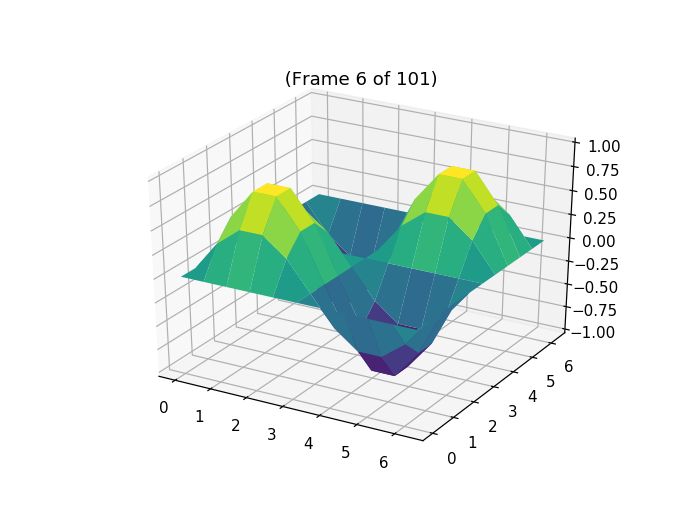

In [90]:
%matplotlib notebook

# Define a time-dependent function
def u_ex(x, y, t):
    return np.exp(-2*t)*np.sin(x)*np.sin(y)

t, T = 0, 1
tau = 0.01

# Generate grid
L = 2*np.pi
n = 10
xi = np.linspace(0,L,n+1)
yi = np.linspace(0,L,n+1)
X,Y = np.meshgrid(xi,yi,sparse=True)

# Store U in a list for animation plot
U_list = [ u_ex(X, Y, 0)]

# Evaluate exact solution at each time step and store it
while t < T:
    t+= tau
    U = u_ex(X, Y, t)
    U_list.append(U)
    
# Set lower and upper z axis limit to avoid rescaling during simulation
zlim=(-1.0,1.0)
# Create animation
ani = plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=zlim)

#### Task 5

Finally,  we have a closer look at the so-called CFL (Courant-Friedrichs-Lewy) condition stating that in two space dimensions,
the explicit Euler scheme given by $\theta = 0$ needs to satisfy the __time-step restriction__
$$
\tau \leqslant h^2/4
$$
to render the full discretization scheme stable. In the Wednesday lecture given by Anne Kværno, you will see/have
already seen how this is related to __stiff system__ and the concept of __$A$-stability__
and the __stability function__.

Now define $\tau$ as follows
$$
\tau = \alpha h^2/4
$$
with  a safety factor $\alpha$ and $h = 2\pi/n$ for some $n\in \NN$.

Choose $t_0 = 0$, $T=1$, $f = g_D = 0$ and
use as initial data the step function
\begin{align*}
u_0(x,y) = 
\begin{cases}
1 \quad \text{if } |x -  \pi| < \pi/3  \wedge |y -  \pi| < \pi/3
\\
0 \quad \text{else.}
\end{cases}
\end{align*}

__a__)
Now solve the heat equation using the explicit Euler for $n = 20$ and corresponding 
time-step $\tau$ for $\alpha = 0.9, 1, 1.1$. What do you observe?
__b__
Repeat the experiment setting the end time to $T = 20$ and
$\alpha = 0.99, 1, 1.01$.  Observation? (That should demonstrate the strictness of the CFL condition.)



### Code Snippet

For the step function you can integrate the following code snippet.

In [ ]:
def u_0_step(x, y):
    step = 0*np.ones_like(x)*np.ones_like(y)

    def is_inside(x, y):
        eps = 1e-10
        return  np.abs(x - np.pi) < np.pi/3  and np.abs(y - np.pi) < np.pi/3

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            if is_inside(x[i,0], y[0,j]):
                step[i,j] = 1
    return step